<center>
    
# Machine Learning with Decision Trees and Random Forests

</center>

#### Census Data and Income - Preprocessing

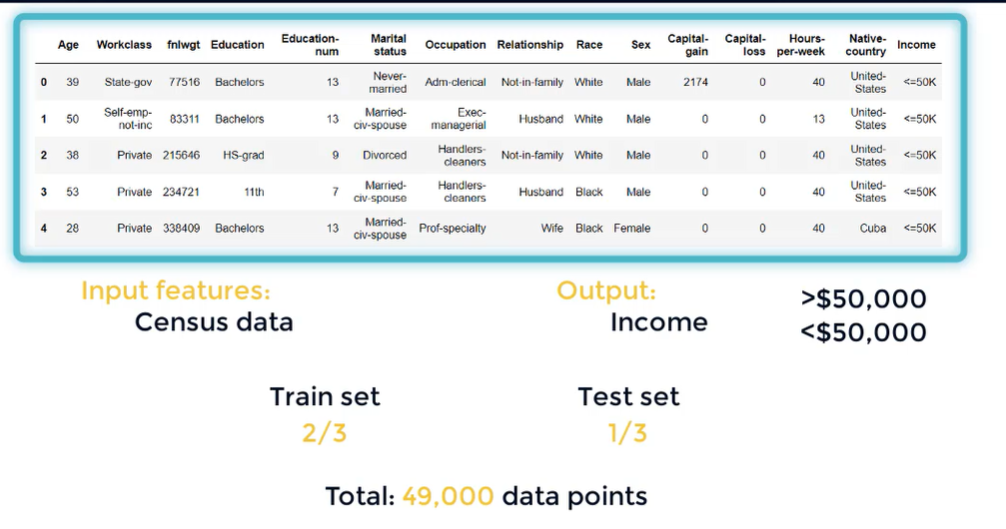

#### Import Libraries

In [1]:
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Preprocessing the data 

##### Training dataset

In [2]:
train_data = pd.read_csv("./data/Census_income_train.csv")

In [3]:
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# length data
len(train_data)

32560

In [5]:
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

##### Removing rows with unknown values ('?')

In [6]:
clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]

In [7]:
len(clean_train_data)

30724

In [8]:
clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]

In [9]:
len(clean_train_data)

30717

In [10]:
clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]

In [11]:
len(clean_train_data)

30161

In [12]:
clean_train_data = clean_train_data.reset_index(drop=True)

In [13]:
clean_train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
len(clean_train_data)

30161

##### We have to transform categorical features into numerical - one hot encode them 

In [15]:
train_dummies = pd.get_dummies(clean_train_data, drop_first=False)

In [16]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


#### Creating dummies variables 

In [17]:
##### Remove Income_ <=50k column from the dataset
train_dummies = train_dummies.drop(['Income_ <=50K'], axis=1)

In [18]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
train_input = train_dummies.iloc[:,:-1]
train_target = train_dummies.iloc[:,-1]

##### It's easier to finish the preprocessing of the test set as well

##### Test dataset

In [20]:
# Load test data
test_data = pd.read_csv("./data/Census_income_test.csv")

In [21]:
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [22]:
len(test_data)

16281

In [23]:
test_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

##### Cleaning unknown values ('?')

In [24]:
clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]

In [25]:
len(clean_test_data)

15318

In [26]:
clean_test_data = clean_test_data[clean_test_data["Occupation"].str.contains("\?") == False]

In [27]:
len(clean_test_data)

15315

In [28]:
clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]

In [29]:
len(clean_test_data)

15060

In [30]:
clean_test_data = clean_test_data.reset_index(drop=True)

#### Creating dummies variables and separating inputs and targets

In [31]:
test_dummies = pd.get_dummies(clean_test_data, drop_first=False)

In [32]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,34,198693,6,0,0,30,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [33]:
test_dummies = test_dummies.drop(['Income_ <=50K.'],axis=1)

In [34]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K.
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,34,198693,6,0,0,30,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [35]:
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]

In [36]:
test_target.head()

0    False
1    False
2     True
3     True
4    False
Name: Income_ >50K., dtype: bool

#### Training the Decision Tree

##### Creating and visualizing the tree

In [37]:
clf = tree.DecisionTreeClassifier(random_state=365)

In [38]:
# training the modell
clf.fit(train_input, train_target)

DecisionTreeClassifier(random_state=365)

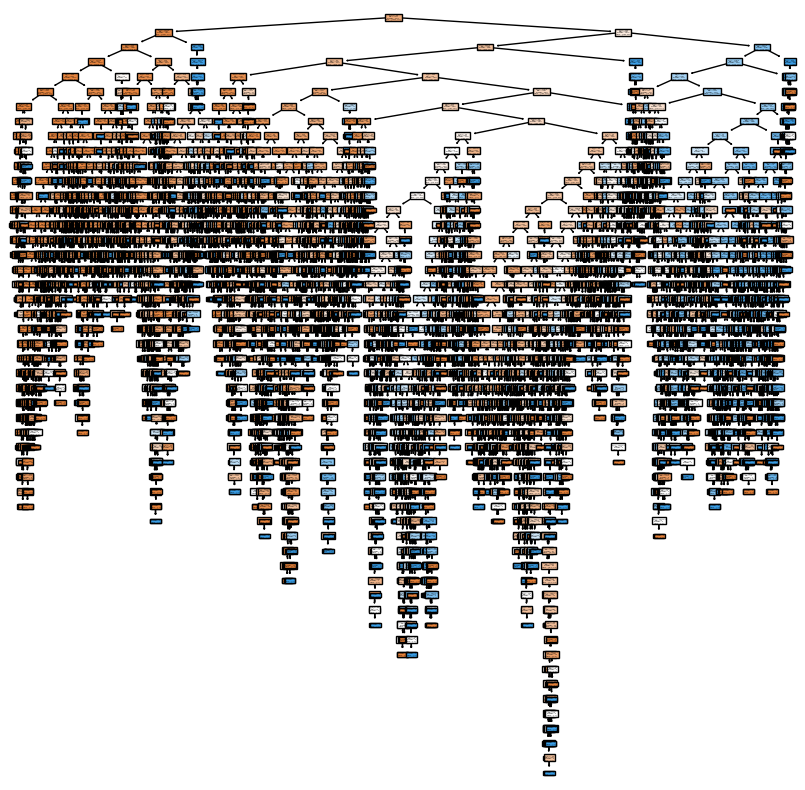

In [39]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True)
plt.show() #overfitted

#### Testing the model

In [40]:
test_pred = clf.predict(test_input)

In [41]:
print(classification_report(test_target, test_pred))
# <$50,000 = 0
# >$50,000 = 1

              precision    recall  f1-score   support

       False       0.87      0.87      0.87     11360
        True       0.60      0.61      0.61      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.80      0.80     15060



##### Creating and visualizing the tree with ccp_alpha

In [42]:
clf = tree.DecisionTreeClassifier(random_state=365, ccp_alpha=0.001)

In [43]:
# training the modell
clf.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=365)

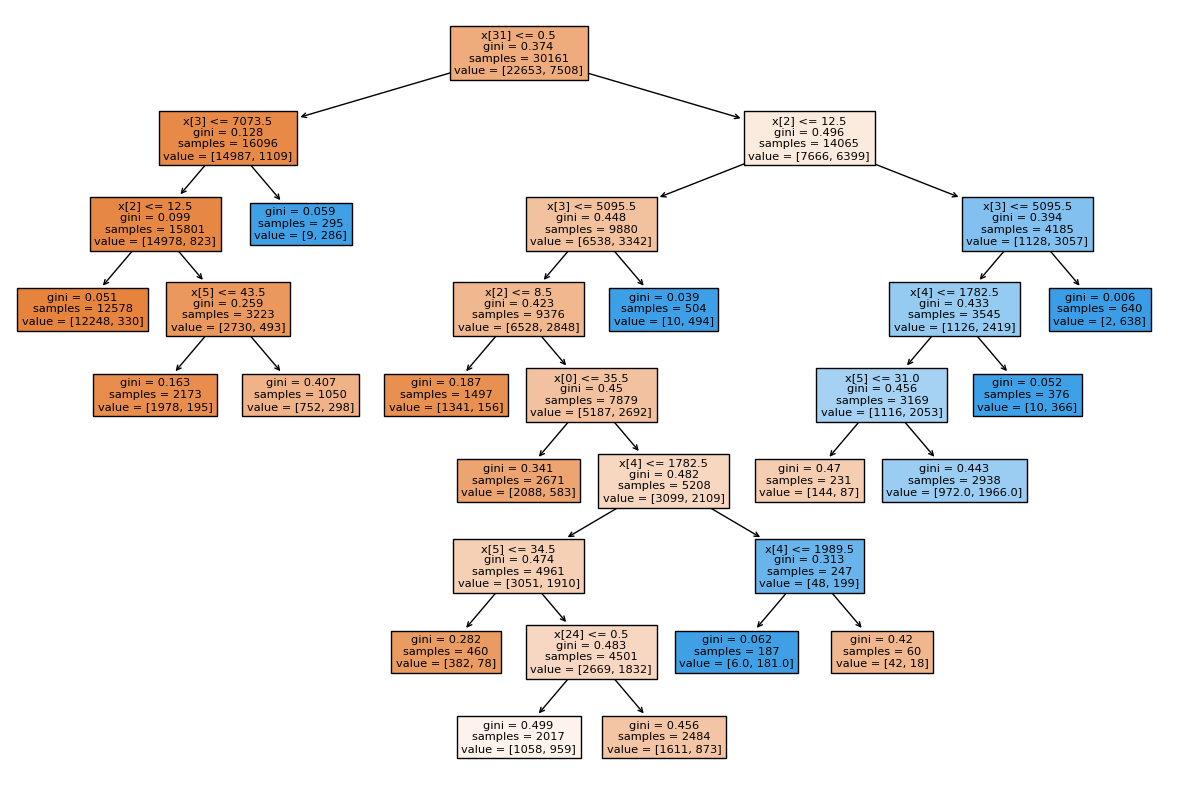

In [44]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

#### Testing the model once again

In [45]:
test_pred = clf.predict(test_input)

In [47]:
print(classification_report(test_target, test_pred))
# <$50,000 = 0
# >$50,000 = 0.85

              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



#### Training the Random Forest

##### Creating and training the model

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [56]:
clf = RandomForestClassifier(random_state=365, n_estimators=150)

In [57]:
clf.fit(train_input,train_target)

RandomForestClassifier(n_estimators=150, random_state=365)

#### Test the model

In [58]:
test_pred = clf.predict(test_input)

In [59]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11360
        True       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



#### Let's introduce pruning

* Random forests are naturally more resistant to overfitting, but pruning can still help sometimes

#### ccp_alpha parameters

In [60]:
clf = RandomForestClassifier(random_state=365, ccp_alpha=0.0001)

In [63]:
clf.fit(train_input,train_target)

RandomForestClassifier(ccp_alpha=0.0001, random_state=365)

#### Test the model

In [64]:
test_pred = clf.predict(test_input)

In [65]:
print(classification_report(test_target, test_pred))
# +1% accuracy performance

              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11360
        True       0.77      0.62      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060



What happened?

* Random forests can perform better than decision trees, but only if the dataset allows it.
* There's a lot of noise in this dataset, as well as many missing variables, such as a person's personality, etc.
* Therefore, the accuracy of any model in the dataset has its limits.

